In [6]:
import sys
sys.path.append('../lib/python/')

import moving_edges

import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from tabulate import tabulate

plt.rcParams['mathtext.fontset'] = 'cm'
import os
save_filepath = os.getcwd() + "/../figures/"


plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42



In [7]:
stimulus_df = pd.read_csv(r'../tiled_edge_stimuli.csv')

stimulus_df['Shape'] = stimulus_df['Shape'].map(lambda shape: list(map(int, shape.split(',')))) #convert shape to int list
stimulus_df['stimulus code'] = stimulus_df['stimulus code'].map(lambda code: list(map(int, code.strip('[]').split(',')))) #convert stimulus code to int list
stimulus_df.index = range(1, stimulus_df.shape[0] + 1)
stimulus_df['T'] = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]) == 1
stimulus_df['C'] = np.array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]) == 1
stimulus_df['CT'] = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XT'] = np.array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XC'] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XCT'] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]) == 1



def count_net_light_dark(stimulus_code):
    reshaped = np.reshape(stimulus_code, [-1, 2])
    net_light = 0
    net_dark = 0
    for cell in reshaped:
        if cell[0] == 1:
            net_light += cell[1]
        elif cell[0] == -1:
            net_dark += cell[1]
    return (net_light, net_dark)

stimulus_df[['net light', 'net dark']] = [count_net_light_dark(stimulus_df.loc[i, 'stimulus code']) for i in stimulus_df.index]
stimulus_df

,Stimulus type,Shape,stimulus code,net movement,discontinuity fraction,T,C,CT,XT,XC,XCT,net light,net dark
1,"T, net zero 1","[2, 4]","[1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1,...",0,0.0,True,False,False,False,False,False,0,0
2,"T, net zero 2","[2, 4]","[1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, ...",0,0.0,True,False,False,False,False,False,-2,2
3,"C, net zero","[2, 4]","[1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, ...",0,0.0,False,True,False,False,False,False,0,0
4,"C, net motion","[2, 4]","[1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -...",4,0.0,False,True,False,False,False,False,2,2
5,"TC, net zero 1","[2, 4]","[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, ...",0,0.0,False,False,True,False,False,False,0,0
6,"TC, net zero 2","[2, 4]","[1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1,...",0,0.5,False,False,True,False,False,False,0,0
7,"TX, net zero","[2, 4]","[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1,...",0,0.0,False,False,False,True,False,False,0,0
8,"TX, net motion","[2, 4]","[1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -...",4,0.0,False,False,False,True,False,False,2,2
9,"CX, net zero 1","[2, 4]","[1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1,...",0,0.0,False,False,False,False,True,False,2,-2
10,"CX, net zero 2","[2, 4]","[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1,...",0,0.0,False,False,False,False,True,False,2,-2


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


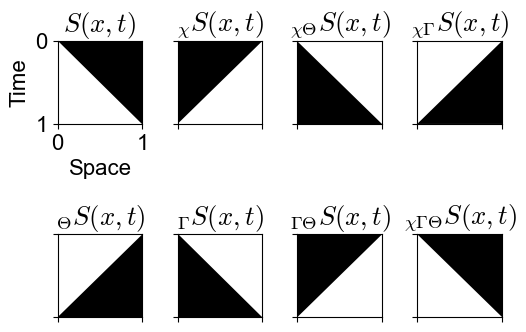

In [9]:
shape = (1, 1)
xtess = 1
ttess = 1

fig = plt.figure(figsize = (3.6*3/2, 3.6))
plt.rcParams['font.size'] = '16'


plt.subplot(2, 4, 1)
moving_edges.display_stimulus(np.array([1,1]), shape, r'$S(x, t)$', xtess, ttess)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.subplot(2, 4, 2)


moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array([1,1]), shape, 'x'), shape, r'$_{\chi}S(x, t)$', xtess, ttess)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(ticks = [0, 1], labels =["", ""])
plt.yticks(ticks = [0, 1], labels =["", ""])

plt.subplot(2, 4, 3)
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array([1,1]), shape, 'xt'), shape, r'$_{\chi\Theta}S(x, t)$', xtess, ttess)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(ticks = [0, 1], labels =["", ""])
plt.yticks(ticks = [0, 1], labels =["", ""])

plt.subplot(2, 4, 4)
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array([1,1]), shape, 'xc'), shape, r'$_{\chi\Gamma}S(x, t)$', xtess, ttess)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(ticks = [0, 1], labels =["", ""])
plt.yticks(ticks = [0, 1], labels =["", ""])

plt.subplot(2, 4, 5)
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array([1,1]), shape, 't'), shape, r'$_{\Theta}S(x, t)$', xtess, ttess)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(ticks = [0, 1], labels =["", ""])
plt.yticks(ticks = [0, 1], labels =["", ""])

plt.subplot(2, 4, 6)
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array([1,1]), shape, 'c'), shape, r'$_{\Gamma}S(x, t)$', xtess, ttess)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(ticks = [0, 1], labels =["", ""])
plt.yticks(ticks = [0, 1], labels =["", ""])

plt.subplot(2, 4, 7)
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array([1,1]), shape, 'ct'), shape, r'$_{\Gamma\Theta}S(x, t)$', xtess, ttess)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(ticks = [0, 1], labels =["", ""])
plt.yticks(ticks = [0, 1], labels =["", ""])

plt.subplot(2, 4, 8)
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array([1,1]), shape, 'xct'), shape, r'$_{\chi\Gamma\Theta}S(x, t)$', xtess, ttess)

plt.ylabel(None)
plt.xlabel(None)
plt.xticks(ticks = [0, 1], labels =["", ""])
plt.yticks(ticks = [0, 1], labels =["", ""])

plt.tight_layout()

plt.savefig(save_filepath + 'fig2/all_flips.pdf', bbox_inches = 'tight')
plt.savefig(save_filepath + 'fig2/all_flips.png', bbox_inches = 'tight')

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


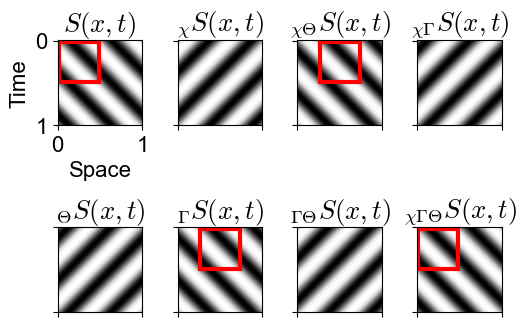

In [11]:
fig = plt.figure(figsize = (3.6*3/2, 3.6))
plt.rcParams['font.size'] = '16'

#build bitmaps
bitmap_1 = np.zeros((720, 720))
bitmap_2 = np.zeros_like(bitmap_1)
bitmap_3 = np.zeros_like(bitmap_1)
bitmap_4 = np.zeros_like(bitmap_1)
for i in range(0, bitmap_1.shape[0]):
    bitmap_1[i] = np.repeat(np.sin((i/180) * np.pi*2/(bitmap_1.shape[0]/360)), bitmap_1.shape[1])

for j in range(0, bitmap_1.shape[1]):
    bitmap_1[:, j] = np.roll(bitmap_1[:, j], np.floor(2*j/2).astype(int))
    bitmap_2[:, j] = np.flip(bitmap_1[:, j])

for i in range(0, bitmap_1.shape[0]):
    bitmap_3[i] = np.flip(bitmap_1[i])

bitmap_4 = bitmap_1 * -1


ax = plt.subplot(2, 4, 1)
#plot
plt.imshow(np.transpose(bitmap_1), cmap = 'Greys')
plt.title('$S(x, t)$')

rect = patches.Rectangle((10, 10), 360 - 20, 360 - 20, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)

plt.xticks([0, 720], [0, 1])
plt.yticks([0, 720], [0, 1])
plt.ylabel("Time")
plt.xlabel("Space")

ax = plt.subplot(2, 4, 2)
plt.imshow(np.transpose(bitmap_2), cmap = 'Greys')
plt.title('$_{\chi}S(x, t)$')
plt.xticks(ticks = [0, 720], labels =["", ""])
plt.yticks(ticks = [0, 720], labels =["", ""])

ax = plt.subplot(2, 4, 3)
plt.imshow(np.transpose(bitmap_4), cmap = 'Greys')
plt.title('$_{\chi\Theta}S(x, t)$')
plt.xticks(ticks = [0, 720], labels =["", ""])
plt.yticks(ticks = [0, 720], labels =["", ""])
rect = patches.Rectangle((180 + 10, 10), 360 - 20, 360 - 20, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)

ax = plt.subplot(2, 4, 4)
plt.imshow(np.transpose(bitmap_3), cmap = 'Greys')
plt.title('$_{\chi\Gamma}S(x, t)$')
plt.xticks(ticks = [0, 720], labels =["", ""])
plt.yticks(ticks = [0, 720], labels =["", ""])

ax = plt.subplot(2, 4, 5)
plt.imshow(np.transpose(bitmap_3), cmap = 'Greys')
plt.title('$_{\Theta}S(x, t)$')
plt.xticks(ticks = [0, 720], labels =["", ""])
plt.yticks(ticks = [0, 720], labels =["", ""])

ax = plt.subplot(2, 4, 6)
plt.imshow(np.transpose(bitmap_4), cmap = 'Greys')
plt.title('$_{\Gamma}S(x, t)$')
plt.xticks(ticks = [0, 720], labels =["", ""])
plt.yticks(ticks = [0, 720], labels =["", ""])
rect = patches.Rectangle((180 + 10, 10), 360 - 20, 360 - 20, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)

ax = plt.subplot(2, 4, 7)
plt.imshow(np.transpose(bitmap_2), cmap = 'Greys')
plt.title('$_{\Gamma\Theta}S(x, t)$')
plt.xticks(ticks = [0, 720], labels =["", ""])
plt.yticks(ticks = [0, 720], labels =["", ""])


ax = plt.subplot(2, 4, 8)
plt.imshow(np.transpose(bitmap_1), cmap = 'Greys')
plt.title('$_{\chi\Gamma\Theta}S(x, t)$')
plt.xticks(ticks = [0, 720], labels =["", ""])
plt.yticks(ticks = [0, 720], labels =["", ""])
rect = patches.Rectangle((10, 10), 360 - 20, 360 - 20, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)

plt.tight_layout()

plt.savefig(save_filepath + 'fig2/sinewave_all_flips.pdf', bbox_inches = 'tight')
plt.savefig(save_filepath + 'fig2/sinewave_all_flips.png', bbox_inches = 'tight')

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


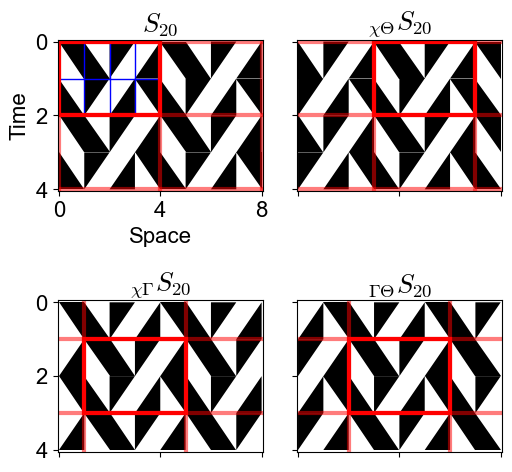

In [12]:
i = 20
plt.rcParams['font.size'] = '16'
shape = stimulus_df.loc[i, 'Shape']
fig = plt.figure(figsize=(5.4, 5))
ax_dict = fig.subplot_mosaic(
    """
    AB
    CD
    """,
    sharey = True
)
ax = plt.axes(ax_dict['A'])
moving_edges.display_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, '$S_{' + str(i) + '}$')
gridrect1 = patches.Rectangle((0, 0), 4, 1, linewidth = 1, edgecolor = 'b', facecolor = 'none', alpha = 1)
gridrect2 = patches.Rectangle((0, 0), 2, 2, linewidth = 1, edgecolor = 'b', facecolor = 'none', alpha = 1)
gridrect3 = patches.Rectangle((1, 0), 2, 2, linewidth = 1, edgecolor = 'b', facecolor = 'none', alpha = 1)


rect = patches.Rectangle((0, 0), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(gridrect1)
ax.add_patch(gridrect2)
ax.add_patch(gridrect3)

ax.add_patch(rect)
ax.set_yticks([0, 2, 4])
ax.set_xticks([0, 4, 8])

rect_list = list()

for k in np.arange(-8, 9, 4):
    for j in np.arange(-4, 5, 2):
        rect_list.append(patches.Rectangle((4 + k,0 + j), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none', alpha = 0.3))
for patch in rect_list:
    ax.add_patch(patch)

ax.set_ylim(4.05, -0.05)
ax.set_xlim(-0.05, 8.05)


ax = plt.axes(ax_dict['B'])
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, 'xt'), shape, '$_{\chi \Theta}S_{' + str(i) + '}$')
rect = patches.Rectangle((3, 0), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)

rect_list = list()

for k in np.arange(-8, 9, 4):
    for j in np.arange(-4, 5, 2):
        rect_list.append(patches.Rectangle(( 3 + k, 0 + j), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none', alpha = 0.3))
for patch in rect_list:
    ax.add_patch(patch)

ax.set_ylim(4.05, -0.05)
ax.set_xlim(-0.05, 8.05)

plt.ylabel(None)
plt.xlabel(None)
ax.set_xticks(ticks = np.arange(0, (shape[1] + 1)*2, 4), labels = np.repeat('', shape[0] +1))

ax = plt.axes(ax_dict['C'])
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, 'xc'), shape, '$_{\chi \Gamma}S_{' + str(i) + '}$')
rect = patches.Rectangle((1, 1), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)
rect_list = list()

for k in np.arange(-8, 9, 4):
    for j in np.arange(-4, 5, 2):
        rect_list.append(patches.Rectangle((1 + k, 1 + j), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none', alpha = 0.3))
for patch in rect_list:
    ax.add_patch(patch)

ax.set_ylim(4.05, -0.05)
ax.set_xlim(-0.05, 8.05)
plt.ylabel(None)
plt.xlabel(None)
ax.set_xticks(ticks = np.arange(0, (shape[1] + 1)*2, 4), labels = np.repeat('', shape[0] +1))

ax = plt.axes(ax_dict['D'])
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, 'ct'), shape, '$_{\Gamma \Theta}S_{' + str(i) + '}$')
rect = patches.Rectangle((2, 1), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)
rect_list = list()

for k in np.arange(-8, 9, 4):
    for j in np.arange(-4, 5, 2):
        rect_list.append(patches.Rectangle((2 + k, 1 + j), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none', alpha = 0.3))
for patch in rect_list:
    ax.add_patch(patch)

ax.set_ylim(4.05, -0.05)
ax.set_xlim(-0.05, 8.05)
plt.ylabel(None)
plt.xlabel(None)
ax.set_xticks(ticks = np.arange(0, (shape[1] + 1)*2, 4), labels = np.repeat('', shape[0] +1))

fig.tight_layout()
plt.savefig(save_filepath + 'fig2/s'  + str(i) + 'flip_tesselation_demo.pdf', bbox_inches = 'tight')
plt.savefig(save_filepath + 'fig2/s'  + str(i) + '_flip_tesselation_demo.png', bbox_inches = 'tight')


plt.show()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


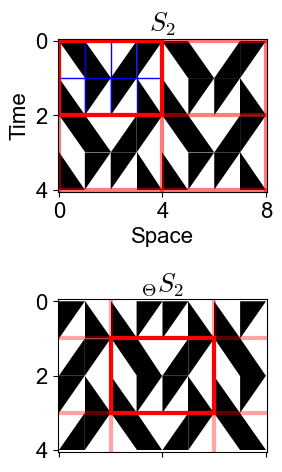

In [13]:
i = 2
plt.rcParams['font.size'] = '16'
shape = stimulus_df.loc[i, 'Shape']
fig = plt.figure(figsize=(3.1, 5))
ax_dict = fig.subplot_mosaic(
    """
    A
    B
    """,
    sharey = True
)
ax = plt.axes(ax_dict['A'])
moving_edges.display_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, '$S_{' + str(i) + '}$')
gridrect1 = patches.Rectangle((0, 0), 4, 1, linewidth = 1, edgecolor = 'b', facecolor = 'none', alpha = 1)
gridrect2 = patches.Rectangle((0, 0), 2, 2, linewidth = 1, edgecolor = 'b', facecolor = 'none', alpha = 1)
gridrect3 = patches.Rectangle((1, 0), 2, 2, linewidth = 1, edgecolor = 'b', facecolor = 'none', alpha = 1)


rect = patches.Rectangle((0, 0), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(gridrect1)
ax.add_patch(gridrect2)
ax.add_patch(gridrect3)

ax.add_patch(rect)
rect_list = list()

for k in np.arange(-8, 9, 4):
    for j in np.arange(-4, 5, 2):
        rect_list.append(patches.Rectangle((4 + k, 0 + j), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none', alpha = 0.3))
for patch in rect_list:
    ax.add_patch(patch)

ax.set_ylim(4.05, -0.05)
ax.set_xlim(-0.05, 8.05)

ax.set_yticks([0, 2, 4])
ax.set_xticks([0, 4, 8])



ax = plt.axes(ax_dict['B'])
moving_edges.display_stimulus(moving_edges.transform_stimulus(np.array(stimulus_df.loc[i, 'stimulus code']), shape, 't'), shape, '$_\Theta S_{' + str(i) + '}$')
rect = patches.Rectangle((2, 1), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)
rect_list = list()

for k in np.arange(-8, 9, 4):
    for j in np.arange(-4, 5, 2):
        rect_list.append(patches.Rectangle((2 + k, 1 + j), 4, 2, linewidth = 3, edgecolor = 'r', facecolor = 'none', alpha = 0.2))
for patch in rect_list:
    ax.add_patch(patch)

ax.set_ylim(4.05, -0.05)
ax.set_xlim(-0.05, 8.05)

plt.ylabel(None)
plt.xlabel(None)
ax.set_xticks(ticks = np.arange(0, (shape[1] + 1)*2, 4), labels = np.repeat('', shape[0] +1))


fig.tight_layout()
plt.savefig(save_filepath + 'fig2/s'  + str(i) + 'flip_tesselation_demo.pdf', bbox_inches = 'tight')
plt.savefig(save_filepath + 'fig2/s'  + str(i) + '_flip_tesselation_demo.png', bbox_inches = 'tight')


plt.show()